In [1]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

### Find initial bandgap

In [2]:
size = 10
thicknesses = [0.50001, 0.50001] * 5 
 

high_eps = 13.0
low_eps = 1.0
Nx = 100


layers = [np.ones((Nx, Nx)) * high_eps if i % 2 == 0 else np.ones((Nx, Nx)) * low_eps for i in range(10)]


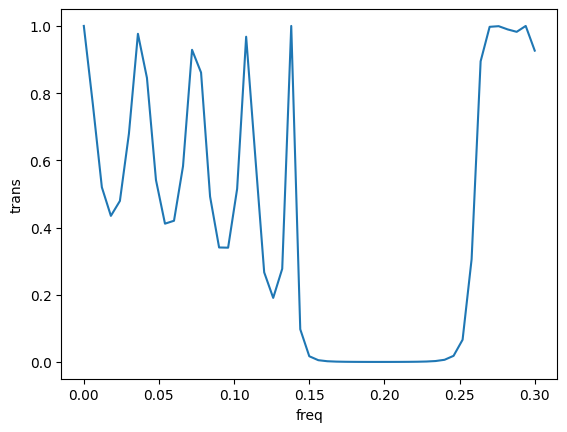

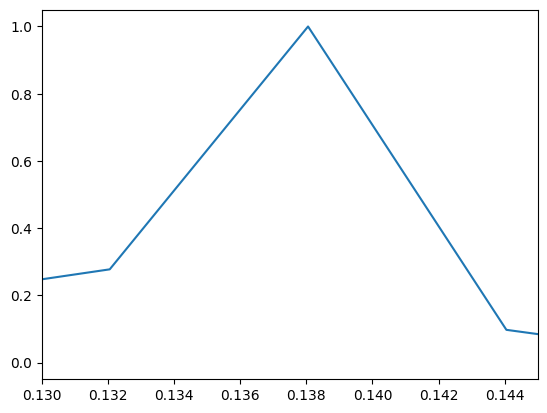

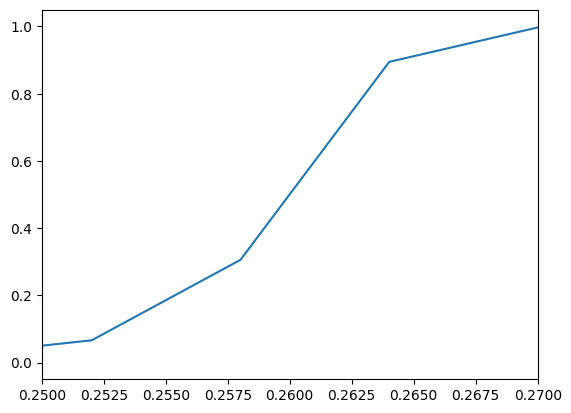

In [6]:
trans = []
kz = []
freqs = np.linspace(0.0001,0.300001,51)
N=1
xs,ys = np.linspace(-0.5,0.5,Nx), np.linspace(-0.5,0.5,Nx)
xs,ys = np.meshgrid(xs,ys)
for freq in freqs:
    obj2 = rcwa(layers, thicknesses, np.ones(10), N=N, M=0, verbose=0)
    # obj2 = rcwa([eps], [thickness], None, N=ind, M=ind, verbose=0)
    obj2.set_freq_k(freq, (0, 0))
    (r, t), (reflected, transmitted) = obj2.get_RT(0, 1)
    trans.append(t)

plt.plot(freqs,trans)
plt.xlabel('freq')
plt.ylabel('trans')
plt.show()
plt.plot(freqs,trans)
plt.xlim(0.13,0.145)
plt.show()
plt.plot(freqs,trans)
plt.xlim(.25,.27)
plt.show()


### Top of bottom most band, seems to live in high eps region, as expected 

1it [00:00, 154.87it/s]
1it [00:00, 229.46it/s]
1it [00:00, 202.79it/s]
1it [00:00, 193.53it/s]
1it [00:00, 69.64it/s]
1it [00:00, 90.33it/s]
1it [00:00, 286.20it/s]
1it [00:00, 374.42it/s]
1it [00:00, 141.48it/s]
1it [00:00, 140.61it/s]
1it [00:00, 368.15it/s]
1it [00:00, 133.14it/s]
1it [00:00, 310.37it/s]
1it [00:00, 685.90it/s]
1it [00:00, 124.44it/s]
1it [00:00, 95.37it/s]
1it [00:00, 307.12it/s]
1it [00:00, 154.44it/s]
1it [00:00, 439.56it/s]
1it [00:00, 164.70it/s]
1it [00:00, 348.16it/s]
1it [00:00, 171.88it/s]
1it [00:00, 414.91it/s]
1it [00:00, 416.85it/s]
1it [00:00, 261.16it/s]
1it [00:00, 137.41it/s]
1it [00:00, 262.87it/s]
1it [00:00, 108.84it/s]
1it [00:00, 74.38it/s]
1it [00:00, 235.37it/s]
1it [00:00, 214.74it/s]
1it [00:00, 277.25it/s]
1it [00:00, 519.80it/s]
1it [00:00, 122.73it/s]
1it [00:00, 555.24it/s]
1it [00:00, 190.43it/s]
1it [00:00, 206.48it/s]
1it [00:00, 26.33it/s]
1it [00:00, 401.75it/s]
1it [00:00, 377.93it/s]
1it [00:00, 130.65it/s]
1it [00:00, 161.03it/

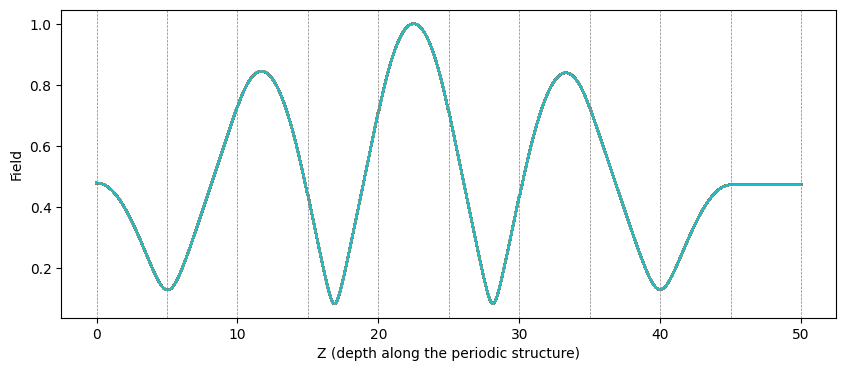

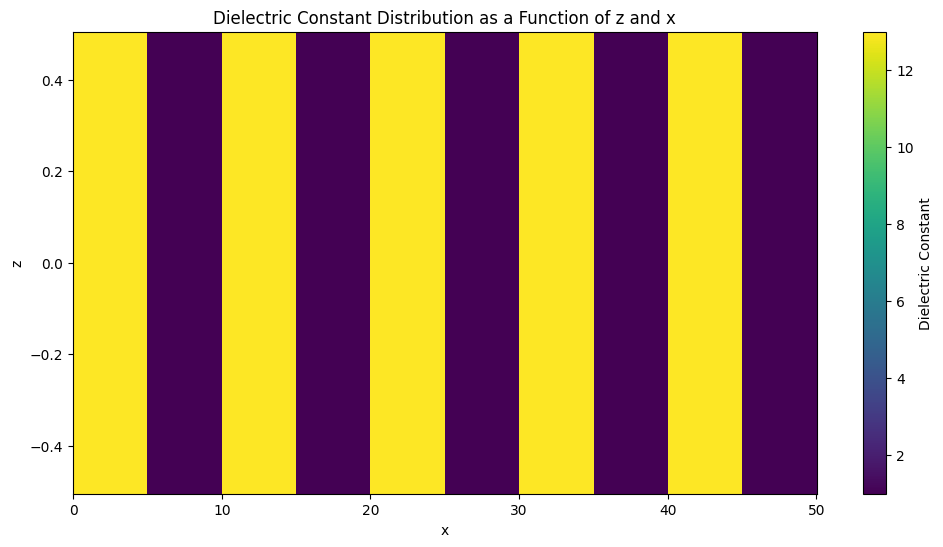

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def rcwa_simulation(layers, thicknesses, indices, N, freq, k_inc, amp, size, z_offsets):
    obj = rcwa(layers, thicknesses, indices, N=N, M=0, verbose=0)
    simulation = SummedRCWA(obj, freq, np.array([k_inc]), np.array([amp]), -size, size, -size, size)
    simulation.total_RT()
    fields = []
    for layer in range(len(layers)):
        for z in z_offsets:
            field = simulation.get_field(z_offset=[z], which_layers=[layer], internal=True)
            fields.append(field)
    return fields, simulation

def plot_mode(fields, simulation, thicknesses, z_offsets, layers, xs):
    ex_total = np.array([np.abs(field[0][0]) for field in fields])  # Assuming field structure is [field, ...]
    # ex_total = np.array([np.sum(np.abs(field[0][0]), axis=0) for field in fields])
    # Normalize the fields for visualization
    ex_norm = ex_total / np.max(np.abs(ex_total))

    z_axis = np.linspace(0, sum(thicknesses) * len(layers), len(z_offsets) * len(layers))

    plt.figure(figsize=(10, 4))
    plt.plot(z_axis, ex_norm)
    vertical_lines = np.arange(0, sum(thicknesses) * len(layers), 0.5 * 10)
    for line in vertical_lines:
        plt.axvline(x=line, color='gray', linestyle='--', linewidth=0.5)

    plt.xlabel('Z (depth along the periodic structure)')
    plt.ylabel('Field')
    plt.show()

    # Prepare data for visualization of the dielectric constant distribution
    layer_stack = np.zeros((Nx, len(z_axis)))
    layer_thickness = np.array(thicknesses)
    z_indices = np.arange(0, len(z_axis), len(z_axis) // len(thicknesses))

    for i, eps_layer in enumerate(layers):
        start_idx = z_indices[i]
        end_idx = z_indices[i + 1] if i + 1 < len(z_indices) else len(z_axis)
        layer_stack[:, start_idx:end_idx] = eps_layer[:, Nx // 2][:, np.newaxis]

    X, Z = np.meshgrid(xs[0], z_axis)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(Z, X, layer_stack.T, shading='auto')
    plt.colorbar(label='Dielectric Constant')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('Dielectric Constant Distribution as a Function of z and x')
    plt.show()

N = 1
freq = 0.1381
kinc = np.array([0, 0])
amp = 1
size = 10
thicknesses = [0.50001, 0.50001] * 5 
z_offsets = np.linspace(0.001, np.min(thicknesses) - 0.001, 100)  

high_eps = 13.0
low_eps = 1.0
Nx = 100


layers = [np.ones((Nx, Nx)) * high_eps if i % 2 == 0 else np.ones((Nx, Nx)) * low_eps for i in range(10)]

fields_photonic, sim_photonic = rcwa_simulation(layers, thicknesses, np.ones(10), N, freq, kinc, amp, size, z_offsets)
plot_mode(fields_photonic, sim_photonic, thicknesses, z_offsets, layers, xs)


### Bottom of second band, seems to live in low eps region, as expected

1it [00:00, 47.64it/s]
1it [00:00, 97.92it/s]
1it [00:00, 170.73it/s]
1it [00:00, 280.26it/s]
1it [00:00, 805.82it/s]
1it [00:00, 198.57it/s]
1it [00:00, 947.87it/s]
1it [00:00, 167.71it/s]
1it [00:00, 368.57it/s]
1it [00:00, 86.16it/s]
1it [00:00, 512.00it/s]
1it [00:00, 108.08it/s]
1it [00:00, 48.99it/s]
1it [00:00, 69.87it/s]
1it [00:00, 65.45it/s]
1it [00:00, 56.42it/s]
1it [00:00, 96.67it/s]
1it [00:00, 57.83it/s]
1it [00:00, 87.66it/s]
1it [00:00, 194.14it/s]
1it [00:00, 102.11it/s]
1it [00:00, 93.85it/s]
1it [00:00, 62.20it/s]
1it [00:00, 52.50it/s]
1it [00:00, 51.73it/s]
1it [00:00, 137.33it/s]
1it [00:00, 66.96it/s]
1it [00:00, 56.40it/s]
1it [00:00, 63.65it/s]
1it [00:00, 270.84it/s]
1it [00:00, 251.13it/s]
1it [00:00, 108.35it/s]
1it [00:00, 73.65it/s]
1it [00:00, 221.04it/s]
1it [00:00, 127.32it/s]
1it [00:00, 193.65it/s]
1it [00:00, 151.63it/s]
1it [00:00, 464.43it/s]
1it [00:00, 230.09it/s]
1it [00:00, 112.57it/s]
1it [00:00, 311.03it/s]
1it [00:00, 427.77it/s]
1it [00:00

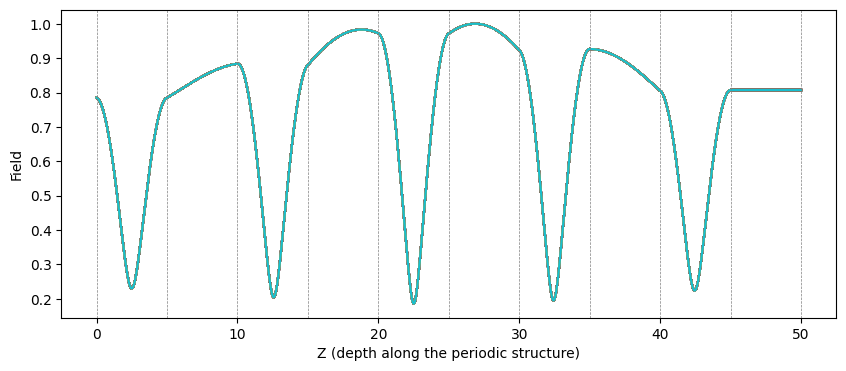

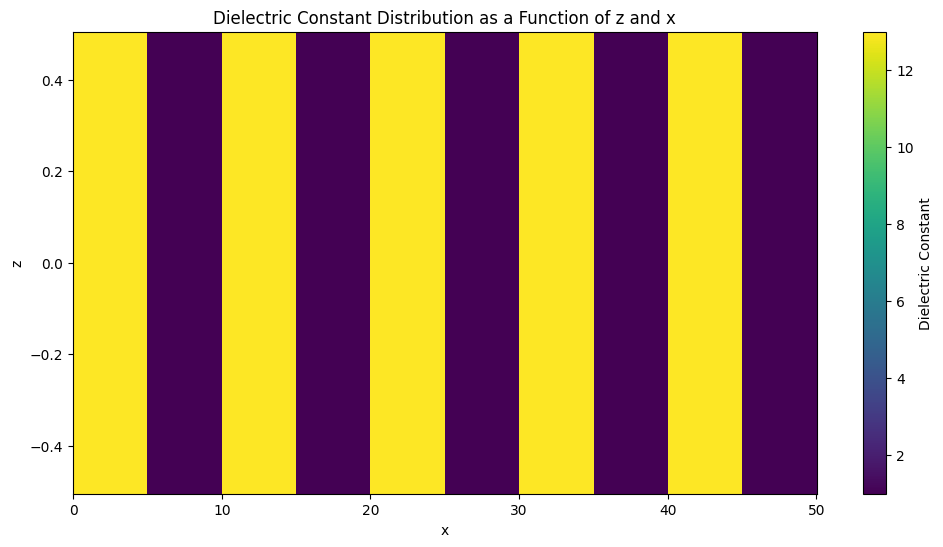

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rcwa_simulation(layers, thicknesses, indices, N, freq, k_inc, amp, size, z_offsets):
    obj = rcwa(layers, thicknesses, indices, N=N, M=0, verbose=0)
    simulation = SummedRCWA(obj, freq, np.array([k_inc]), np.array([amp]), -size, size, -size, size)
    simulation.total_RT()
    fields = []
    for layer in range(len(layers)):
        for z in z_offsets:
            field = simulation.get_field(z_offset=[z], which_layers=[layer], internal=True)
            fields.append(field)
    return fields, simulation

def plot_mode(fields, simulation, thicknesses, z_offsets, layers, xs):
    ex_total = np.array([np.abs(field[0][0]) for field in fields])  # Assuming field structure is [field, ...]
    # ex_total = np.array([np.sum(np.abs(field[0][0]), axis=0) for field in fields])
    # Normalize the fields for visualization
    ex_norm = ex_total / np.max(np.abs(ex_total))

    z_axis = np.linspace(0, sum(thicknesses) * len(layers), len(z_offsets) * len(layers))

    plt.figure(figsize=(10, 4))
    plt.plot(z_axis, ex_norm)
    vertical_lines = np.arange(0, sum(thicknesses) * len(layers), 0.5 * 10)
    for line in vertical_lines:
        plt.axvline(x=line, color='gray', linestyle='--', linewidth=0.5)

    plt.xlabel('Z (depth along the periodic structure)')
    plt.ylabel('Field')
    plt.show()

    # Prepare data for visualization of the dielectric constant distribution
    layer_stack = np.zeros((Nx, len(z_axis)))
    layer_thickness = np.array(thicknesses)
    z_indices = np.arange(0, len(z_axis), len(z_axis) // len(thicknesses))

    for i, eps_layer in enumerate(layers):
        start_idx = z_indices[i]
        end_idx = z_indices[i + 1] if i + 1 < len(z_indices) else len(z_axis)
        layer_stack[:, start_idx:end_idx] = eps_layer[:, Nx // 2][:, np.newaxis]

    X, Z = np.meshgrid(xs[0], z_axis)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(Z, X, layer_stack.T, shading='auto')
    plt.colorbar(label='Dielectric Constant')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('Dielectric Constant Distribution as a Function of z and x')
    plt.show()

N = 1
freq = 0.27
kinc = np.array([0, 0])
amp = 1
size = 10
thicknesses = [0.50001, 0.50001] * 5 
z_offsets = np.linspace(0.001, np.min(thicknesses) - 0.001, 100)  

high_eps = 13.0
low_eps = 1.0
Nx = 100


layers = [np.ones((Nx, Nx)) * high_eps if i % 2 == 0 else np.ones((Nx, Nx)) * low_eps for i in range(10)]

fields_photonic, sim_photonic = rcwa_simulation(layers, thicknesses, np.ones(10), N, freq, kinc, amp, size, z_offsets)
plot_mode(fields_photonic, sim_photonic, thicknesses, z_offsets, layers, xs)
